# Microsoft Movie Analysis

_Author: Valentina Valdez_

## 1.0 Overview

Create table of contents?

#### Proposal Answers

##### When doing your analysis, what measurement will you use to determine the success of a movie? (e.g.: rating, return on investment, worldwide gross) Refer to this article for an example of how different metrics can lead to different results: ArticleLinks to an external site.
Your Answer:
I will use the following metrics:

Ratings - which genres, directors, writers, and/or actors have the highest ratings. As a new studio, Microsoft will want to build a library with reputable content.
Return on investment (ROI) - identify the characteristics of movies with the highest ROI potential. 

##### What are some aspects of a movie you could investigate? (e.g.: Genres, Release time, Director/Actors, Budget)
Your Answer:
Genre - ideally, I would like to examine the trend in genres as they tend to be cyclical. Identify which genres are popular now and if possible, identify which genres are making a resurgence. 
Staffing - identify the staff that is part of successful movies (either through ROI or ratings). I will break down the staff by genre as well since some writers or directors may be best suited for a particular genre. 

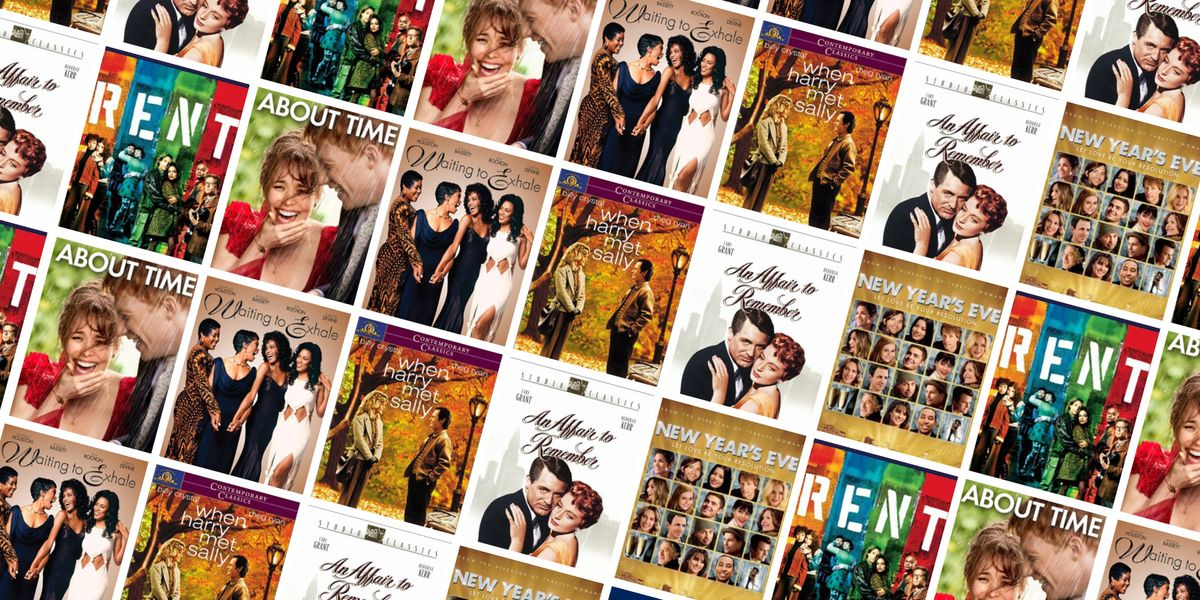

## 2.0 Business Understanding

Microsoft's decision to venture into the movie industry marks an exciting strategic shift. By telling compelling stories through film, Microsoft can connect with audiences on an emotional level and establish a stronger presence in popular culture, leading to increased brand awareness. 

Other tech companies, such as Apple and Amazon, have succesfully transition into the entertainment industry. By leveraging its extensive technological expertise, vast resources, and global reach, Microsoft can produce high-quality movies can will enhance Microsoft's brand image and increase its cultural influence.

This research seeks to use the available data to gain valuable insights into trends and consumption patterns, enabling the company to create tailored content that resonates with viewers and maximizes box office success. Within this notebook, we will explore what types of films Microsoft should make to maximize not just its return on investment but also positive brand exposure by producing critically acclaimed films. 

Given the above needs, this analysis will strive to answer the following questions:
- What kind of films have a high ROI? Which genres, directors, actors, and writers have procuded films with high ROIs? 
- Which directors, actors, and writers have experience creating high-prestige films?
- Are there films that have both promising ROI and prestige? If so, who may be able to produce this winning combination?

Let's dive in!

## 3.0 Data Understanding

This analysis uses a variety of trusted data sources. The datasets will be used to narrow down how Microsoft should  invest in its filmaking efforts. The sources are as follows:

- **IMDB:** Launched in 1990 - and owned by Amazon since 1998 - IMDB is one of the most popular and recognizable databases. This database houses a large amount of information such as directors, writers, genres, and release date.  
- **The Numbers:** This database was started in 1997, and is now the largest freely available database of movie business information. The available data contains information about movie titles, production budgets, and gross revenue data. 
- **The Academy Awards, 1927-2015**: This dataset was provided by the Academy of Motion Pictures Arts & Sciences for a Kaggle competition. The Academy Awards is considered the most prestigious filmaking award in America, and this data will provide valuable insights in identifying individuals capable of making prestige films. This dataset, as the title suggests, contains information on Academy Award nominees and winners between the years 1927 anf 2015. Access the data <a href="https://www.kaggle.com/datasets/theacademy/academy-awards?select=database.csv">here</a> .  


This analysis is limited by the information in these datasets, and may not fully encompass the full scope of the filmaking industry. However, the data is current enough that this analysis can still provide valuable insight and guide Microsoft on their next steps. 


The first step in this analysis is to understand the data and how we can transform it to gleam insights. First, I am importing the necessary libraries to read the data and perform the necessary analysis. I will review the data sources one by one to determine what needs to be done before we can perform analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

### 3.1 IMDB

Let's examine IMDB's database first, which is the most exhaustive of the three. I will need information on movies titles, their genres, and the directors, actors, and writers per film. 

In [2]:
#Import data


#Review tables


In [3]:
#Query relevant tables

### 3.2 The Numbers

For this dataset, the goal is to calculate the Return on Investment per film. Eventually, I can tie this information to the IMDB table and identify which genres and film staff (such as director, writers, and actors) have produced high ROIs. 

In [4]:
numbers_df = pd.read_csv('Data/tn.movie_budgets.csv.gz')
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The initial assessment is that this data will need to be converted in the following ways:

- The budget and gross data columns need to be converted to integers 
- The release_date column needs to be coverted to datetime object
- There are no null values, but I will need to further examine to make sure that the values are valid 

### 3.3 The Academy Awards

As mentioned earlier, Microsoft should pursue both high ROIs as well as this dataset will be critical in providing information on prestige capabilities. With the help of the IMDB database, I will be able to tie genres, films and film staff to prestige. Another interesting exploration will be finding out which writers, directors, actors, and/or genres are more likely to produce award winning films. 

In [6]:
#Import data
academy_df = pd.read_csv('Data/academy_data.csv')

#Review data - review tail to see the most recent films included in the dataset
academy_df.head()

,Year,Ceremony,Award,Winner,Name,Film
0,1927/1928,1,Actor,NaN,Richard Barthelmess,The Noose
1,1927/1928,1,Actor,1.0,Emil Jannings,The Last Command
2,1927/1928,1,Actress,NaN,Louise Dresser,A Ship Comes In
3,1927/1928,1,Actress,1.0,Janet Gaynor,7th Heaven
4,1927/1928,1,Actress,NaN,Gloria Swanson,Sadie Thompson


It looks like this dataset is ordered by year. Lets compare the results to the most recent film data.

In [7]:
academy_df.tail()

,Year,Ceremony,Award,Winner,Name,Film
9959,2015,88,Writing (Original Screenplay),1.0,Spotlight,Written by Josh Singer & Tom McCarthy
9960,2015,88,Writing (Original Screenplay),NaN,Straight Outta Compton,Screenplay by Jonathan Herman and Andrea Berlo...
9961,2015,88,Jean Hersholt Humanitarian Award,1.0,Debbie Reynolds,NaN
9962,2015,88,Honorary Award,1.0,Spike Lee,NaN
9963,2015,88,Honorary Award,1.0,Gena Rowlands,NaN


In [8]:
#Check for column types and null values
academy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      9964 non-null   object 
 1   Ceremony  9964 non-null   int64  
 2   Award     9964 non-null   object 
 3   Winner    2321 non-null   float64
 4   Name      9964 non-null   object 
 5   Film      9631 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 467.2+ KB


The initial assessment of this data is:

- I will need to pick a year (since the elegibility window for the academy  for Change year to be the first year
- The eremony column not needed and can be dropped. I am interested in wheter they received an award, not if the award ceremony occured or if the person was present. 
- The Winner is not necessary, but will keep in case we want to see the most awarded. But ultimately, being nominated is what I looking for. 
- Change NaN to some other value that means no. Missing values seem to just be the people that did not win. 
- Name will be a challenge since depending on the Award, this can be either the name of a person or the name of the film. I will need to transform this data and fill in some values from the IMDB table. 
- Film, will change missing to some other value. Some awards are not based on a movie but may be a lifetime or achievement award.

## 4.0 Data Preparation

Now that we have a good understanding of our data, lets clean the datasets, add some features, and combine tables. 

### 4.1 IMDB

### 4.2 The Numbers

This dataset is key to findind out ROI numbers.  

In [9]:
duplicates = numbers_df[numbers_df.duplicated()]
print(len(duplicates))

0


Great, no duplicate rows. Let's check for any extraneous values:


In [10]:
for col in numbers_df.columns:
    print(col, '\n', numbers_df[col].value_counts(normalize=True).head(), '\n\n')

id 
 4     0.010031
53    0.010031
61    0.010031
65    0.010031
69    0.010031
Name: id, dtype: float64 


release_date 
 Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2013    0.002248
Name: release_date, dtype: float64 


movie 
 Home                0.000519
King Kong           0.000519
Halloween           0.000519
The Fog             0.000346
Dawn of the Dead    0.000346
Name: movie, dtype: float64 


production_budget 
 $20,000,000    0.039952
$10,000,000    0.036666
$30,000,000    0.030612
$15,000,000    0.029920
$25,000,000    0.029575
Name: production_budget, dtype: float64 


domestic_gross 
 $0             0.094777
$8,000,000     0.001557
$7,000,000     0.001211
$2,000,000     0.001211
$10,000,000    0.001038
Name: domestic_gross, dtype: float64 


worldwide_gross 
 $0             0.063473
$8,000,000     0.001557
$7,000,000     0.001038
$2,000,000     0.001038
$10,000,000    0.000692
Name: worldwide_gross, dtype: fl

Unfortunately, this dataset contains some movies that do not have reported worldwide gross numbers. These will be dropped, but first, they need to be converted to numbers. 

Next, convert column data types. 

In [11]:
#Converting release_date to datetime object
numbers_df['release_date'] = pd.to_datetime(numbers_df['release_date'])
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
#First, remove '$' from the string
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols:
    numbers_df[col] = numbers_df[col].str.replace('$','').str.replace(',','')
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [13]:
#Converting production_budget, domestic_gross, and worldwide_gross columns to float

cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
numbers_df[cols] = numbers_df[cols].apply(pd.to_numeric, axis=1)
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [14]:
#Drop rows where worldwide_gross is 0. 
numbers_df = numbers_df.loc[numbers_df['worldwide_gross'] > 0]
numbers_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,2006-05-26,Cavite,7000,70071,71644
5776,77,2004-12-31,The Mongol King,7000,900,900
5778,79,1999-04-02,Following,6000,48482,240495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338


In [15]:
#Adding ROI Column
numbers_df['ROI'] = (numbers_df['worldwide_gross'] - numbers_df['production_budget']) \
                    / numbers_df['production_budget'] * 100

numbers_df['ROI'] = numbers_df['ROI'].round(decimals=2)

numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.26
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.67
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.21
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.38
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.37


And done for now. I will revisit this dataset once all tables have been cleaned. 

### 4.3 The Academy Awards, 1927-2015

In [16]:
#Reviwing the data again
academy_df.head()

,Year,Ceremony,Award,Winner,Name,Film
0,1927/1928,1,Actor,NaN,Richard Barthelmess,The Noose
1,1927/1928,1,Actor,1.0,Emil Jannings,The Last Command
2,1927/1928,1,Actress,NaN,Louise Dresser,A Ship Comes In
3,1927/1928,1,Actress,1.0,Janet Gaynor,7th Heaven
4,1927/1928,1,Actress,NaN,Gloria Swanson,Sadie Thompson


In [17]:
#Checking for duplicates
duplicates = academy_df[academy_df.duplicated()]
print(len(duplicates))

0


In [18]:
#Checking for extraneous values. 
for col in academy_df.columns:
    print(col, '\n', academy_df[col].value_counts(normalize=True).head(), '\n\n')

Year 
 1942    0.018667
1941    0.018366
1943    0.018266
1944    0.016961
1945    0.016058
Name: Year, dtype: float64 


Ceremony 
 15    0.018667
14    0.018366
16    0.018266
17    0.016961
13    0.016058
Name: Ceremony, dtype: float64 


Award 
 Directing                       0.043055
Film Editing                    0.041148
Actress in a Supporting Role    0.040145
Actor in a Supporting Role      0.040145
Documentary (Short Subject)     0.034926
Name: Award, dtype: float64 


Winner 
 1.0    1.0
Name: Winner, dtype: float64 


Name 
 Meryl Streep         0.001907
Titanic              0.001305
Cleopatra            0.001305
Katharine Hepburn    0.001204
Jack Nicholson       0.001204
Name: Name, dtype: float64 


Film 
 Metro-Goldwyn-Mayer      0.006230
Walt Disney, Producer    0.005918
Warner Brothers          0.004361
John Williams            0.004361
France                   0.003738
Name: Film, dtype: float64 




In [19]:
#Addressing Year Column

#Remove the double years and convert to integer
academy_df['Year'] = academy_df['Year'].str[:4].astype(int)

#Review results
academy_df['Year'].head()

0    1927
1    1927
2    1927
3    1927
4    1927
Name: Year, dtype: int64

In [24]:
len(academy_df['Award'].unique())

114

In [55]:
academy_df['Award'].unique()

array(['Actor', 'Actress', 'Art Direction', 'Cinematography',
       'Directing (Comedy Picture)', 'Directing (Dramatic Picture)',
       'Engineering Effects', 'Outstanding Picture',
       'Unique and Artistic Picture', 'Writing (Adaptation)',
       'Writing (Original Story)', 'Writing (Title Writing)',
       'Special Award', 'Directing', 'Writing', 'Outstanding Production',
       'Sound Recording', 'Short Subject (Cartoon)',
       'Short Subject (Comedy)', 'Short Subject (Novelty)',
       'Assistant Director', 'Film Editing', 'Music (Scoring)',
       'Music (Song)', 'Dance Direction', 'Writing (Screenplay)',
       'Actor in a Supporting Role', 'Actress in a Supporting Role',
       'Short Subject (Color)', 'Short Subject (One Reel)',
       'Short Subject (Two Reel)', 'Irving G. Thalberg Memorial Award',
       'Music (Original Score)', 'Cinematography (Black and White)',
       'Cinematography (Color)', 'Special Effects',
       'Art Direction (Black and White)', 'Art Direct

In [47]:
#Get list of awards and convert to a dataframe
awards_list_array = academy_df['Award'].unique()
awards_df = pd.DataFrame(data=awards_list_array, columns=['award_name'])
awards_df.head()

,award_name
0,Actor
1,Actress
2,Art Direction
3,Cinematography
4,Directing (Comedy Picture)


In [54]:
#Categorize award names by type
awards_df['actor'] = awards_df['award_name'].str.contains('Actor|Actress')
awards_df

,award_name,actor
0,Actor,True
1,Actress,True
2,Art Direction,False
3,Cinematography,False
4,Directing (Comedy Picture),False
...,...,...
109,Animated Feature Film,False
110,Writing (Adapted Screenplay),False
111,Sound Mixing,False
112,Makeup and Hairstyling,False


In [51]:
#Keep only cetain categories - writing, director, and actor / actress. 
#Sparate by 
best_picture = academy_df.iloc[academy_df['Award'] is 'Best Motion Picture']

<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-51-8ca1b41d3fc3>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  best_picture = academy_df.iloc[academy_df['Award'] is 'Best Motion Picture']


TypeError: Cannot index by location index with a non-integer key

### 4.4 Merging and Combining Datasets

## 5.0 Exploratory Data Analysis

### 5.1 Which movie genres have the highest ROI?

## Recommendations

After this preliminary review, we recommend that Microsoft invests in the following strategies:



However, much research is still to be done. The biggest recommendation is to continue this research and explore the following: 